In [2]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('housing.csv')
target = 'median_house_value'
df = pd.get_dummies(df)

In [15]:
# Regresion lineal simple total rooms, guarda predicciones en df
X = df[['total_rooms']]
y= df[[target]]
df = pd.get_dummies(df)

In [16]:
# Regresion polinomial grado 2
X= df[['total_rooms']]
y=df[target]
model=linear_model.LinearRegression().fit(X,y)
df['predicciones_lineal']=model.predict(X)  


# Regresion polinomial grado 3
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)  # Transformar X a características polinómicas

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_poly, y)
df['predicciones_poly2']= model.predict(X_poly)

In [17]:
# Regresion polinomial grado 3
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)  # Transformar X a características polinómicas

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_poly, y)
df['predicciones_poly3']= model.predict(X_poly)

In [18]:
# Regresion polinomial grado 4
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)  # Transformar X a características polinómicas

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_poly, y)
df['predicciones_poly4']= model.predict(X_poly)

In [24]:
# Bivariado de total rooms 
df['bins']= pd.qcut(df['total_rooms'], q=10,labels=False) +1

In [25]:

grouped= df.groupby('bins').mean()

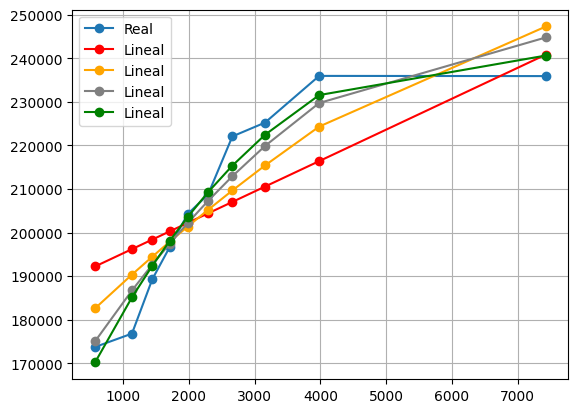

In [33]:
# Bivariado
plt.plot(grouped.total_rooms.values,
        grouped.median_house_value, marker='o',
        label='Real')

plt.plot(grouped.total_rooms.values, grouped.predicciones_lineal, marker='o', label='Lineal', color='red')

plt.plot(grouped.total_rooms.values, grouped.predicciones_poly2, marker='o', label='Lineal', color='orange')

plt.plot(grouped.total_rooms.values, grouped.predicciones_poly3, marker='o', label='Lineal', color='grey')

plt.plot(grouped.total_rooms.values, grouped.predicciones_poly4, marker='o', label='Lineal', color='green')
plt.grid()
plt.legend()

### Crea una regresión polinomial con todos y has cross validación, obten el R2 

In [73]:
df = pd.read_csv('housing.csv')
target = 'median_house_value'
df = pd.get_dummies(df)


In [74]:
# Simple

df['density']= df['households'] / df['population']

In [75]:
X= df.copy()
X= X.drop(target, axis=1)
X['total_bedrooms']= df.total_bedrooms.fillna(df.total_bedrooms.mean())

del X['households']
del X['population']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


model= linear_model.LinearRegression().fit(X_train,y_train)
predicciones= model.predict(X_test)
r2_score(y_pred=predicciones,y_true=y_test)

0.6606839273622849

In [76]:
# Grado 2
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)  # Transformar X a características polinómicas
X_test_poly = poly_features.fit_transform(X_test)
# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train)

predicciones = model.predict(X_test_poly)
r2_score(y_pred=predicciones,y_true=y_test)


0.6265162532188168

In [77]:
X_train_poly.size

1502592

In [78]:
# Grado 3
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)  # Transformar X a características polinómicas
X_test_poly = poly_features.fit_transform(X_test)
# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train)

predicciones = model.predict(X_test_poly)
r2_score(y_pred=predicciones,y_true=y_test)

-28.804029343376463

In [79]:
X_train_poly.size

7512960

In [80]:
len(X_train_poly)

16512

In [81]:
# Grado 4
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)  # Transformar X a características polinómicas
X_test_poly = poly_features.fit_transform(X_test)
# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train)

predicciones = model.predict(X_test_poly)
r2_score(y_pred=predicciones,y_true=y_test)

0.015367766576156572